# Maths - Form & Function: Chapter 2 (From Whole Numbers to Rational Numbers)

In [1]:
from sympy import *
from sympy.printing.latex import LatexPrinter

class CustomLatexPrinter(LatexPrinter):
    def _print_Idx(self, expr):
        return expr.name

    @classmethod
    def printer(cls, expr, **kwargs):
        return cls(kwargs).doprint(expr)

init_printing(use_latex = "mathjax", latex_printer = CustomLatexPrinter.printer)

## 1. Properties of Natural Numbers

The natural numbers arise from:

- listing
- counting
- comparing

In [2]:
S.Naturals

ℕ

In [3]:
k, m, n = symbols("k, m, n", integer = True)

# Commutative law part 1: Addition
Eq(
    m + 0,
    m
)

True

In [4]:
# Commutative law part 2: Addition
Eq(
    m + n,
    n + m
)

True

In [5]:
# Associative law: Addition
Eq(
    k + (m + n),
    (k + m) + n
)

True

In [6]:
# Commutative law part 1: Multiplication
Eq(
    m * 1,
    m
)

True

In [7]:
# Commutative law part 2: Multiplication
Eq(
    m * n,
    n * m
)

True

In [8]:
# Associative law: Multiplication
Eq(
    k * (m * n),
    (k * m) * n
)

True

In [9]:
# Distributive law
Eq(
    k * (m + n),
    k * m + k * n
).simplify()

True

In [10]:
# Remainders of square numbers always 0 or 1
FiniteSet(0, 1).contains((k**2) % 4).doit()

 2               
k  mod 4 ∈ {0, 1}

In [11]:
b, i, n = symbols("b, i, n", domain = S.Naturals)
a = IndexedBase("a")
k = Idx("k", range = (0, i))

expansion = summation(a[k] * b**k, k)
Eq(n, expansion)

      i          
     ___         
     ╲           
      ╲    k     
n =   ╱   b ⋅a[k]
     ╱           
     ‾‾‾         
    k = 0        

In [12]:
# Finding decimal expansion of 123
a_coefs = [1, 2, 3][::-1]
j = len(a_coefs) - 1
decimal_expansion = summation(a[k] * b**k, (k, 0, j))

# decimal expansion
coefs_dic = {a[j]: a_coefs[j] for j in range(3)}
decimal_expansion.subs(b, 10).subs(coefs_dic)

123

# 2. The Peano Postulates

The Peano postulates emerge from the fact that both addition and multiplication can be described in terms of the number 0 & the single operation "add 1"; the postulates are the folowing axioms on that single operation:

1. 0 is a number
2. if *n* is a number, so is its successor *sn*
3. 0 is not a successor (*sn* is never 0)
4. 2 numbers *n*, *m* with the same successor are equal
5. Let *P* be a property of natural numbers; if 0 has *P* & *sn* has *P* where *n* does, then *P* holds for all natural numbers.

In [13]:
from sympy.core.assumptions import assumptions

m, n = symbols("m, n", domain = S.Naturals0)

class s(Function):
    """ The successor function. """
    @classmethod
    def eval(cls, n):
        if n.is_Number:
            if S.Naturals0.contains(n):
                return n + 1
            
s(0)

1

In [14]:
# postulate i
S.Naturals0.contains(0)

True

In [15]:
# postulate ii
(S.Naturals0.contains(n)) >> (S.Naturals0.contains(s(n)))

(n ∈ ℕ₀) → (s(n) ∈ ℕ₀)

In [16]:
# postulate iii
Not(Eq(0, s(n)))

0 ≠ s(n)

In [17]:
# postulate iv
Implies(
    Eq(s(n), s(m)),
    Eq(n, m)
)

s(n) = s(m) → n = m

In [18]:
a = IndexedBase("a")
i = Idx("i", range = (1, n))

first_n_squares = summation(a[i]**2, i)
first_n_squares

  n        
 ___       
 ╲         
  ╲       2
  ╱   a[i] 
 ╱         
 ‾‾‾       
i = 1      

In [19]:
coefs = list(range(1, 4))
coefs_dic = {a[j]: coefs[j-1] for j in range(1, 4)}

first_n_squares = summation(a[i]**2, (i, 1, 3))
first_n_squares.subs(coefs_dic)

14

In [20]:
k = symbols("k")

# Recursive addition
Eq(k + 0, k)

True

In [21]:
Eq(k + s(n), s(k + n))

k + s(n) = s(k + n)

In [22]:
# Recursive multiplication
Eq(k * 0, 0)

True

In [23]:
Eq(k * s(n), k + (k * n))

k⋅s(n) = k⋅n + k

In [24]:
# Recursive Exponentiation
Eq(k**0, 1)

True

In [25]:
Eq(k**s(n), k * (k**n))

 s(n)      n
k     = k⋅k 

In [26]:
class recursiveAddition(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return k
        else:
            return k + n

recursiveAddition(0)

k

In [27]:
recursiveAddition(s(0))

k + 1

In [28]:
recursiveAddition(s(1))

k + 2

In [29]:
class recursiveMultiplication(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return 0
        else:
            return k * n
        
recursiveMultiplication(0)

0

In [30]:
recursiveMultiplication(s(0))

k

In [31]:
recursiveMultiplication(s(1))

2⋅k

In [32]:
class recursiveExponentiation(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return 1
        else:
            return k**n

recursiveExponentiation(0)

1

In [33]:
recursiveExponentiation(s(0))

k

In [34]:
recursiveExponentiation(s(1))

 2
k 

In [35]:
f = Function("f")
g = Function("g")

Eq(f(0), a), Eq(f(s(m)), g(f(m)))

(f(0) = a, f(s(m)) = g(f(m)))

**Uniqueness Theorem**

*The set-theoretic Peano postulates determine the collection **N** of natural numbers uniquely, up to an isomorphism of the structure given by 0 and successor.*

## 3. Natural Numbers Described by Recursion

General Point: the axioms needed to describe a Mathematical structure are themselves by no means unique. The recursion theorum for example is a convenient form of axiom.

In [36]:
from sympy import pprint
from sympy.categories import *

N = S.Naturals
S_ob = Object("S")

s = NamedMorphism(N, N, "s")
sDash = NamedMorphism(S_ob, S_ob, "sDash")
h = NamedMorphism(N, S_ob, "h")
i = NamedMorphism(S_ob, N, "i")

d = Diagram([s, sDash, h, i])

drawer = XypicDiagramDrawer()
print(drawer.draw(d, DiagramGrid(d)))
# https://quicklatex.com/
# Add `\usepackage[all]{xy}` to the preamble

\xymatrix{
S \ar[r]^{i} \ar@(u,l)[]^{sDash} & \mathbb{N} \ar@/^3mm/[l]^{h} \ar@(r,u)[]^{s} 
}



In [37]:
x = symbols("x")

N = S.Naturals0
S_ob = ConditionSet(x, N.contains(x))
S_ob

{x | (x ∈ ℕ₀)}

In [38]:
-1 in S_ob

False

In [39]:
0 in S_ob

True

In [40]:
class i(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == S_ob:
            return N
        
i(S_ob)

ℕ₀

In [41]:
class zero(Function):
    @classmethod
    def eval(cls):
        return S_ob
    
zero()

{x | (x ∈ ℕ₀)}

In [42]:
class sDash(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == S_ob:
            return S_ob
    
sDash(S_ob)

{x | (x ∈ ℕ₀)}

In [43]:
class h(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return S_ob
        
h(N)

{x | (x ∈ ℕ₀)}

In [44]:
class f(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return i(h(arg1))
        
f(N)

ℕ₀

In [45]:
class s(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return N
        
s(N)

ℕ₀

In [46]:
sDash(h(N)) == h(s(N))

True

In [47]:
s(f(N)) == f(s(N)) # identity function

True

In [48]:
f(N) == i(h(N))

True

## 4. Number Theory

In [88]:
m, n, q, r = symbols("m, n, q, r", integer = True)

division_algorithm = Eq(m, n*q + r)
division_algorithm

m = n⋅q + r

In [92]:
division_algorithm.subs([(m, 10), (n, 3), (q, 3), (r, 1)])

True

In [103]:
# Show list of primes
sieve._reset()
sieve.extend(17)
sieve._list

array('l', [2, 3, 5, 7, 11, 13, 17])

In [120]:
# The last prime on the above list
factors17 = factorint(17, visual = True)
factors17

  1
17 

In [121]:
factors17.doit()

17

In [118]:
# Even numbers other than 2 cannot be prime
factors18 = factorint(18, visual = True)
factors18

 1  2
2 ⋅3 

In [119]:
factors18.doit()

18

Unique Factorization Theorum:

Every number *n* can be factored into a product of primes (though some may be repeated).

- Primes: numbers divided only by themselves & 1
- Factored: repeatedly divided down to numbers whose product is the original
- Prime Factorization: factorization down to prime numbers only

In [128]:
[factorint(x, visual = True) for x in sieve._list]

⎡ 1   1   1   1    1    1    1⎤
⎣2 , 3 , 5 , 7 , 11 , 13 , 17 ⎦

In [139]:
[factorint(x, visual = True) for x in range(1, 18) if not(isprime(x))]

⎡    2   1  1   3   2   1  1   2  1   1  1   1  1   4⎤
⎣1, 2 , 2 ⋅3 , 2 , 3 , 2 ⋅5 , 2 ⋅3 , 2 ⋅7 , 3 ⋅5 , 2 ⎦

In [148]:
factorint(12, visual = True)

 2  1
2 ⋅3 

In [151]:
factorint(16, visual = True)

 4
2 

In [178]:
common_factor = list(set(factorint(12).keys()) & set(factorint(16).keys()))
common_factor

[2]

In [179]:
greatest_common_divisor = igcd(12, 16)
greatest_common_divisor

4

In [180]:
factorized_numbers = 2
common_factor[0] * factorized_numbers == greatest_common_divisor

True

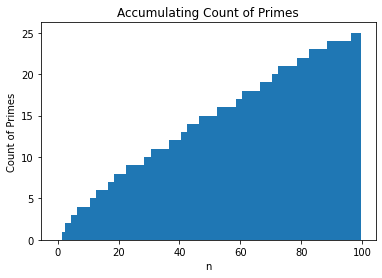

In [195]:
import matplotlib.pyplot as plt

prime_range = range(0, 100)
prime_count = [primepi(n) for n in prime_range]

plt.bar(prime_range, prime_count, width = 1)
plt.title("Accumulating Count of Primes")
plt.xlabel("n")
plt.ylabel("Count of Primes")
plt.show()

In [198]:
x, y, z = symbols("x, y, z", integers = True)

fermats = Eq(x**2 + y**2, z**2)
fermats

 2    2    2
x  + y  = z 

In [237]:
fermats.subs([(x, 3), (y, 4), (z, 5)])

True

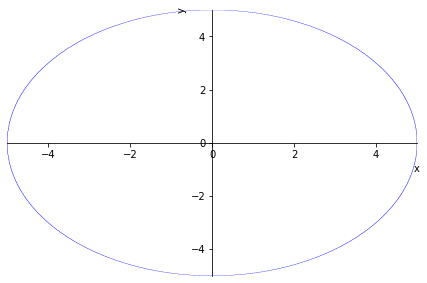

In [238]:
plot_implicit(Eq(x**2 + y**2, z**2).subs(z, 5))

In [223]:
from sympy.solvers.diophantine.diophantine import sum_of_squares

list(sum_of_squares(25, 2))

[(3, 4)]

In [257]:
from sympy.solvers.diophantine.diophantine import diop_DN

D = 2
N = 1
diop_DN(D, N)

[(3, 2)]

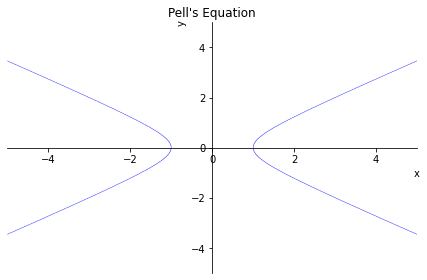

In [252]:
# n (sometimes D) here must be positive non-square integer
plot_implicit(Eq(x**2 - (n * y**2), 1).subs(n, 2), title = "Pell's Equation")

## 5. Integers

In [50]:
def naturalNumberAdditionWithOneNegative(n, m):
    """ Checks the rules of addition of natural numbers with 1 negative. """
    if n >= 0 and m >= 0:
        if n >= m:
            return n + (-m) == n - m
        elif n < m:
            return n + (-m) == -(m - n)


print(naturalNumberAdditionWithOneNegative(5, 2))
print(naturalNumberAdditionWithOneNegative(2, 5))

True
True


In [51]:
def naturalNumberAdditionWithTwoNegatives(n, m):
    """ Checks the rules of addition of natural numbers with 2 negatives. """
    if n >= 0 and m >= 0:
        return (-n) + (-m) == -(n + m)
    

print(naturalNumberAdditionWithTwoNegatives(5, 2))

True


Another example of defining operations for **Z** series of integers:

In [52]:
def sumForIntegers(x, y):
    """ Definition of sum for set of integers. """
    m, n = x
    mp, np = y
    return (m + mp, n + np)

print(sumForIntegers((2, 3), (2, 3)))
print(sumForIntegers((-2, -3), (-2, -3)))
print(sumForIntegers((-2, 3), (2, -3)))
print(sumForIntegers((2, -3), (-2, 3)))
print()
print(sumForIntegers((2, 2), (2, 2)))

(4, 6)
(-4, -6)
(0, 0)
(0, 0)

(4, 4)


In [53]:
def productForIntegers(x, y):
    """ Definiton of product for set of integers. """
    m, n = x
    mp, np = y
    return (m * mp + n * np, m * np + n * mp)

print("Both up : " + str(productForIntegers((2, 3), (2, 3))))
print("Both down : " + str(productForIntegers((3, 2), (3, 2))))
print("Down then up : " + str(productForIntegers((3, 2), (2, 3))))
print("Up then down : " + str(productForIntegers((2, 3), (3, 2))))
print()
print(productForIntegers((-2, -3), (-2, -3)))
print(productForIntegers((-2, 3), (2, -3)))
print(productForIntegers((2, -3), (-2, 3)))
print(productForIntegers((-2, 3), (-2, 3)))
print()
print(productForIntegers((2, 2), (2, 2)))

Both up : (13, 12)
Both down : (13, 12)
Down then up : (12, 13)
Up then down : (12, 13)

(13, 12)
(-13, 12)
(-13, 12)
(13, -12)

(8, 8)


## 6. Rational Numbers

Fractions are the response to the inability of numbers to always be divided evenly into whole numbers:

In [54]:
def sumForFractions(x, y):
    """ Definition of sum for fractions """
    m, n = x
    mp, np = y
    return ((m * np + mp * n), n * np)

print(sumForFractions((2, 3), (1, 4)))
print(sumForFractions((5, 1), (5, 1)))

(11, 12)
(10, 1)


In [55]:
def productForFractions(x, y):
    """ Definition of product for fractions. """
    m, n = x
    mp, np = y
    return (m * mp, n * np)

print(productForFractions((2, 3), (1, 4)))
print(productForFractions((2, 3), (2, 3)))
print(productForFractions((5, 1), (5, 1)))

(2, 12)
(4, 9)
(25, 1)


# 7. Congruence

In [56]:
def castingOutNinesMultiplication(x, y):
    """ Check that the result of a multiplication is correct. """
    result = x * y
    x = sum(map(int, str(x)))
    y = sum(map(int, str(y)))
    digitSum1 = sum(map(int, str(x * y)))
    digitSum2 = sum(map(int, str(sum(map(int, str(result))))))
    print("Result    : " + str(result))
    print("digitSum1 : " + str(digitSum1))
    print("digitSum2 : " + str(digitSum2))
    return digitSum1 == digitSum2

castingOutNinesMultiplication(32, 26)

Result    : 832
digitSum1 : 4
digitSum2 : 4


True

In [57]:
def isCongruent(a, b, m):
    """ Checks that a is congruent to b. """
    if m != 0:
        difference = a - b
        if difference % m == 0:
            return True
    
    return False


print(isCongruent(24, 5, 10))
print(isCongruent(25, 5, 10))

False
True


In [58]:
def congruentSum(a, b, c, d, m):
    """ Checks that sums are congruent. """
    if isCongruent(a, b, m) and isCongruent(c, d, m):
        return isCongruent(a + c, b + d, m)
    else:
        return False
    
    
print(congruentSum(20, 3, 18, 8, 8))
print(congruentSum(20, 4, 25, 1, 8))

False
True


In [59]:
def congruentProduct(a, b, c, d, m):
    """ Checks that products are congruent. """
    if isCongruent(a, b, m) and isCongruent(c, d, m):
        return isCongruent(a * c, b * d, m)
    else:
        return False
    

print(congruentProduct(20, 3, 18, 8, 8))
print(congruentProduct(20, 4, 25, 1, 8))

False
True


In [60]:
import sympy

def EulersPhiFunction(m):
    """ Eulers Phi function counts no. remaineders with no factor in
    common with the modulus m. """
    if sympy.isprime(m):
        return m - 1
    else:
        factors = sympy.factorint(m)
        if len(factors) == 1:
            for a, b in factors.items():
                return (a - 1) * (a ** (b - 1))
        else:
            a, b = [k for k, v in factors.items() if v == 1]
            return EulersPhiFunction(a) * EulersPhiFunction(b)


print(EulersPhiFunction(7))
print(EulersPhiFunction(9))
print(EulersPhiFunction(6))

6
6
2


3 descriptions of algebra of integers module *m*:

- ordinary integers with new equality; congurence modulo *m*
- algebra of remainders modulo *m*
- algebra of congruence classes, modulo *m*

In [61]:
def chineseRemainderTheorem(x, b, m, c, n):
    """ If m & n are coprime x can be found via product of m & n. """
    if sympy.isprime(m) and sympy.isprime(n) and m != n:
        if isCongruent(x, b, m) and isCongruent(x, c, n):
            N = m * n
            c1 = N // m
            c2 = N // n
            _, y1, _ = sympy.gcdex(m, c1)
            _, y2, _ = sympy.gcdex(n, c2)
            return x == (b * c1 * y1) + (c * c2 * y2)
    
    return False
        
print(chineseRemainderTheorem(8, 2, 3, 3, 5))

True


# 8. Cardinal Numbers

A cardinal number can be defined as:

- card S = {S' | S $\equiv$ S'}

That is: the cardinal set S is the set of all sets S' where S' are restricted to being congruent with S.

> ... a finite cardinal *number* is just a finite set taken "modulo" cardinal eqivalence ...

There is a strong analogy between congruence class modulo *m* & cardinal numbers.

A *power set* is:

- PU = {S | S $\subset$ U}

# 9. Ordinal Numbers

poset = a partially ordered set

- ord P = {P' | P' $\in$ V$_1$ and P ~ P'}

~ here represents *ordinally equivalent*.

Arithmetic operations on finite ordinal sets work identically to those on cardinals.
But this is not the case with infinite order sets, for example:

- $N^+$ has a 1st element
- $N^-$ has no 1st element (not regarded as an infinite ordinal number)

# 10. What Are Numbers?

Alternative answers to this question are:

- any sequence of marks (with successors) used for counting or labeling
- natural numbers are finite sets with equinumerous sets regarded as equal
- natural numbers are cardinal-equivalence classes of finite sets
- natural numbers are ordinal-equivalence classes of finite ordered sets
- natural numbers are finite sets of sets linearly ordered by membership relation

This leads to the conclusion that there is no single definition of natural numbers; instead one defines the system of all natural numbers with a successor operation.

*N* is any such system which satisfies the Peano postulates.

> The natural numbers start out from elementary operations of counting, listing, and comparing; they then develop into effective tools for calculation.
The rules for calculation are formal and can be organized as the consequences of simple systems of postulates.
The consequencesof these postulates include the remarkaby varied and rich properties studied in number theory . . .

But number theory leads to other ideas:

1. calculations with *N* do not allow all substractions or divisions so require **Z** & *Q*.
2. calculations with congruences & integers modulo *m* (classes of numbers)
3. the study of sets and functions